# Class 7 Exercises — Solutions

These exercises will help you practice the skills and concepts that you learned in today's class.

To get participation credit for today's class, make sure that you work on these exercises and then submit a screenshot or PDF of your work to the appropriate assignment page in Canvas.

___

## Datasheets for Datasets
### *The Pudding*'s Film Dialogue Data

[Google Doc for Datasheets with Datasets Group Exercise](https://docs.google.com/document/d/1EMsuxPrX4ChO2HSMy_zKidS-KQluoIfcv0_23W5BKuA/edit?usp=sharing)

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

Our goals in this notebook:
1. First, we want to explore and clean the dataset. What are the overall trends and patterns here?
2. Then, we want to ask some specific questions. Which characters speak the most and least in the entire dataset?
3. Finally, we want to ask: Can we identify and plot the top 20 movies with the most male vs female dialogue?

## Import Pandas

To use the Pandas library, we first need to `import` it.

In [2]:
import pandas as pd

## Change Display Settings

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [3]:
pd.options.display.max_rows = 200

## Get Data

In [4]:
film_df = pd.read_csv('../Exercises/Class7-Exercises/Pudding-Film-Dialogue-Clean.csv', encoding='utf=8', delimiter=',')

This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#DataFrame) — often abbreviated as *df*, e.g., *slave_voyages_df*. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

## Overview

Examine the first 9 rows in the DataFrame

In [5]:
film_df.head(9)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280
5,The Bridges of Madison County,1995,Michael Johnson,man,723,0.113075,38.0,142.0,280
6,The Bridges of Madison County,1995,Robert Kincaid,man,1908,0.298405,65.0,142.0,280
7,15 Minutes,2001,Bobby Korfin,man,328,0.036012,NaN,37.0,623
8,15 Minutes,2001,Daphne Handlova,woman,409,0.044906,28.0,37.0,623


Examine a random 8 rows in the DataFrame

In [6]:
film_df.sample(8)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
10801,The Surfer King,2006,Robbie Zirpollo,man,3890,0.244224,25.0,NaN,3473
18711,The Odd Couple II,1998,Frances Unger M,woman,103,0.010026,57.0,35.0,7137
20095,Stuart Little,1999,"Mrs. Keeper, Th",woman,281,0.051343,40.0,239.0,7752
19580,Carrie,2013,Billy Nolan,man,448,0.053930,NaN,37.0,7516
11255,True Romance,1993,Lenny,man,286,0.010221,59.0,25.0,3612
17128,Play Misty for Me,1971,Madge,woman,140,0.020222,62.0,NaN,6128
8686,Major League,1989,Pepper Leach,man,442,0.017657,48.0,109.0,2824
1817,L.A. Confidential,1997,D.A. Ellis Loew,man,350,0.036893,58.0,122.0,1080


Generate information about all the columns in the data (such as the data types for each column)

In [7]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23047 non-null  object 
 1   release_year            23047 non-null  int64  
 2   character               23047 non-null  object 
 3   gender                  23047 non-null  object 
 4   words                   23047 non-null  int64  
 5   proportion_of_dialogue  23047 non-null  float64
 6   age                     18262 non-null  float64
 7   gross                   19386 non-null  float64
 8   script_id               23047 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of all the numerical columns in the DataFrame

array([[<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'words'}>],
       [<AxesSubplot:title={'center':'proportion_of_dialogue'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'script_id'}>]], dtype=object)

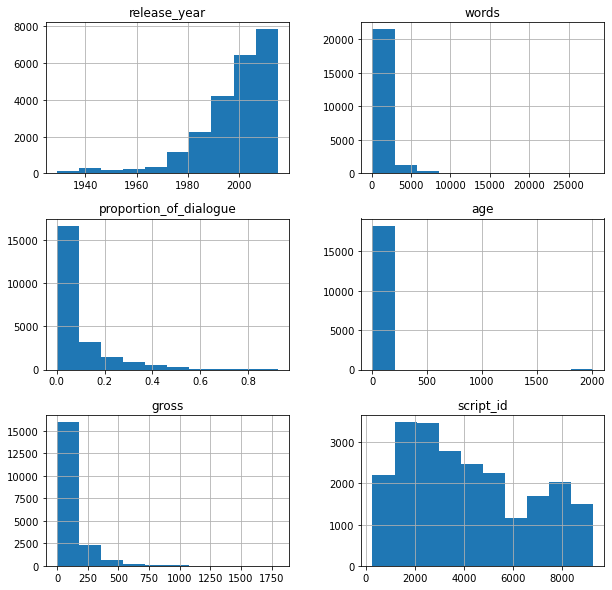

In [8]:
film_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [9]:
film_df.describe(include='all')

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
count,23047,23047.000000,23047,23047,23047.000000,23047.000000,18262.000000,19386.000000,23047.000000
unique,1994,NaN,17543,3,NaN,NaN,NaN,NaN,NaN
top,Lone Star,NaN,Doctor,man,NaN,NaN,NaN,NaN,NaN
freq,40,NaN,37,16131,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.132425,NaN,NaN,907.902634,0.086518,42.275052,106.735428,4194.804486
std,NaN,14.746052,NaN,NaN,1399.616135,0.107746,57.912595,145.861933,2473.037601
min,NaN,1929.000000,NaN,NaN,101.000000,0.001537,3.000000,0.000000,280.000000
25%,NaN,1992.000000,NaN,NaN,193.000000,0.019773,30.000000,22.000000,2095.000000
50%,NaN,2001.000000,NaN,NaN,396.000000,0.042423,39.000000,56.000000,3694.000000
75%,NaN,2009.000000,NaN,NaN,980.000000,0.104171,50.000000,136.000000,6224.500000


### ❓ What patterns or outliers do you notice?

## Filter/Subset Data

Make a filter that will check whether the age for a character is greater than 100

In [10]:
age_filter = film_df['age'] > 100

Then use this filter to select only characters who are older than 100

In [11]:
film_df[age_filter]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
4024,American Psycho,2000,Harold Carnes,man,434,0.025271,2000.0,24.0,1639
5254,Case 39,2009,Margaret Sulliv,woman,310,0.037944,2009.0,15.0,1962
5370,Chaos,2005,Bernie Callo,man,244,0.015051,2005.0,NaN,1985
5950,The Departed,2006,Realtor,man,148,0.005575,2006.0,175.0,2144
6899,Get Carter,2000,Thorpey,man,133,0.026552,2000.0,24.0,2380
7787,Into the Wild,2007,Bull,man,188,0.009936,2007.0,23.0,2625
7968,Jay and Silent Bob Strike Back,2001,Silent Bob'S Mo,woman,224,0.009292,2001.0,46.0,2673
9233,Never Been Kissed,1999,Monty Malik,man,104,0.005219,1999.0,95.0,2986
9617,The Piano,1993,Nessie,woman,116,0.012262,1993.0,84.0,3095
9819,Raging Bull,1980,Reporter,man,300,0.013364,1980.0,NaN,3169


## Drop Rows

To drop the character from the dataset who are supposedly older than 100, you will need to find the index numbers for every relevant row

In [12]:
film_df = film_df.drop(film_df[age_filter].index) 

Check to see whether the data has been dropped

In [13]:
film_df[age_filter]

<ipython-input-13-1055e22700a9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  film_df[age_filter]


,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


## Sort Values

Sort the DataFrame from the character who has the highest `proportion_of_dialogue` to the lowest.  Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [14]:
film_df.sort_values(by='proportion_of_dialogue', ascending=False)[:20]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
7242,Happy Feet,2006,Mumble,man,2677,0.923422,25.0,262.0,2483
16371,The End of the Tour,2015,David Lipsky,man,3117,0.911137,32.0,3.0,5485
21092,Duel,1971,David Mann,man,2660,0.881086,47.0,NaN,8164
3650,127 Hours,2010,Aron Ralston,man,4336,0.842760,32.0,20.0,1520
22236,Alfie,2004,Alfie,man,5852,0.814815,32.0,18.0,8683
21663,Mala Noche,1986,Walt,man,2093,0.810612,NaN,NaN,8423
1019,Duck Soup,1933,Groucho,man,3697,0.730344,NaN,NaN,873
4569,The Battle of Algiers,1966,Col. Mathieu,man,4962,0.723113,44.0,6.0,1780
17750,1408,2007,Mike Enslin,man,2338,0.703581,41.0,91.0,6537
18138,Jumpin' Jack Flash,1986,Terry Dolittle,woman,4722,0.699452,31.0,60.0,6798


Sort the DataFrame from the character who has the lowest `proportion_of_dialogue` to the highest. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [15]:
film_df.sort_values(by='proportion_of_dialogue', ascending=True)[:20]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
5283,Casino,1995,Piscano'S Wife,woman,104,0.001537,NaN,84.0,1963
5272,Casino,1995,Frankie Avalon,man,106,0.001566,56.0,84.0,1963
5291,Casino,1995,Vinny Forlano,man,112,0.001655,NaN,84.0,1963
5262,Casino,1995,Cashier,woman,114,0.001684,NaN,84.0,1963
5277,Casino,1995,La Banker,man,114,0.001684,61.0,84.0,1963
5292,Casino,1995,Winner,man,116,0.001714,NaN,84.0,1963
5286,Casino,1995,Security Guard,man,116,0.001714,55.0,84.0,1963
8031,JFK,1991,Prison Guard,man,106,0.001802,NaN,145.0,2682
5258,Casino,1995,Anna Scott,woman,124,0.001832,NaN,84.0,1963
5257,Casino,1995,Amy Rothstein (,woman,130,0.001921,NaN,84.0,1963


Sort the DataFrame from the character who speaks the least number of `words` to the character who speaks the most number of words. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [18]:
film_df.sort_values(by='words', ascending=True)[:20]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
15233,Sweeney Todd: The Demon Barber of Fleet Street,2007,Happy Customer',woman,101,0.011676,NaN,66.0,5083
20449,Lawless,2012,Danny,man,101,0.009168,46.0,40.0,7882
21869,Transcendence,2014,Martin,man,101,0.012063,44.0,24.0,8525
17979,My Best Friend's Birthday,1987,Cute Girl,woman,101,0.010254,NaN,NaN,6625
22909,The Utah Murder Project,2006,Deputy Bracken,man,101,0.008809,45.0,NaN,9214
18487,Inside Man,2006,Miriam Douglas,woman,101,0.008012,NaN,117.0,6968
17857,Searching for Bobby Fischer,1993,Tournament Dire,man,101,0.010766,53.0,15.0,6576
15725,"The Chronicles of Narnia: The Lion, the Witch ...",2005,Maugrim,man,101,0.021734,47.0,396.0,5300
16598,Pok�mon: The First Movie - Mewtwo Strikes Back,1998,Umio,man,101,0.032268,32.0,158.0,5523
1224,Forrest Gump,1994,Abbie Hoffman,man,101,0.011111,34.0,686.0,921


### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?